<h1 align="center"> <strong>🌲 Extra Trees - Complete Guide</strong> </h1>

This notebook provides a comprehensive introduction to Extra Trees (Extremely Randomized Trees), covering:
- Algorithm overview and key concepts
- Comparison with Random Forest
- Implementation using scikit-learn
- Hyperparameter tuning
- Feature importance visualization
- Best practices and use cases

---

## **📚 1. Import Libraries and Setup**

In [ ]:
# Core libraries
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.datasets import make_regression , make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor, RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    mean_squared_error, r2_score, mean_absolute_error
)

# Visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## **🌲 2. Extra Trees Algorithm Overview**

Extra Trees (Extremely Randomized Trees) is an ensemble learning method that belongs to the family of bagging algorithms. It was introduced by Pierre Geurts, Damien Ernst, and Louis Wehenkel in 2006.

### **Key Concepts**

Extra Trees builds multiple decision trees and uses averaging to improve predictive accuracy and control over-fitting. The algorithm introduces two key sources of randomization:

1. **Random Feature Subset**: Like Random Forest, it selects a random subset of features at each node.

2. **Random Split Thresholds**: Unlike Random Forest, Extra Trees selects split points completely randomly, rather than searching for the optimal split.

### **Key Differences from Random Forest**

| 📌 **Characteristic** | 🌲 **Extra Trees** | 🌳 **Random Forest** |
| ------------------- | ----------------- | -------------------- |
| **Split Selection** | Completely random splits | Optimized splits (best from random subset) |
| **Bootstrap Sampling** | Typically doesn't use bootstrap (default) | Uses bootstrap sampling |
| **Randomization Level** | Higher randomization | Moderate randomization |
| **Bias-Variance Trade-off** | Lower variance, higher bias | Balance between bias and variance |
| **Training Speed** | Faster (no optimization at splits) | Slower (optimizes splits) |
| **Overfitting Risk** | Lower risk of overfitting | Moderate risk of overfitting |

### **How It Works**

1. Build multiple decision trees (estimators)
2. For each node in a tree:
   - Select a random subset of features
   - For each feature, draw a random split point (not optimized)
   - Select the best feature/split combination based on the impurity criterion
3. Grow trees to maximum depth or until stopping criteria are met
4. Aggregate predictions:
   - Classification: majority voting
   - Regression: averaging

## **📊 3. Use Cases and When to Use Extra Trees**

### **Ideal Use Cases**

Extra Trees is particularly well-suited for:

- **High-dimensional data**: Effective with many features due to random feature selection
- **Noisy datasets**: The random splitting makes it more robust to noise
- **Feature importance analysis**: Provides stable feature importance scores
- **When computational efficiency matters**: Faster than Random Forest due to random splits
- **Ensemble diversity**: When you need highly diverse base estimators

### **When to Use Extra Trees vs. Random Forest**

- **Use Extra Trees when**:
  - You need faster training times
  - Your dataset has significant noise
  - You want to reduce the risk of overfitting
  - You need more diverse trees in your ensemble

- **Use Random Forest when**:
  - You need slightly better predictive performance
  - You have clean data with clear patterns
  - You're less concerned about training time

### **When NOT to Use Extra Trees**

- **Small datasets**: May not have enough data to benefit from the randomization
- **When interpretability is critical**: Like all tree ensembles, less interpretable than single trees
- **When you need a deterministic model**: The random nature makes results vary between runs
- **Very sparse data**: May not perform optimally on extremely sparse datasets

## **📊 4. Generate Sample Data**

In [ ]:
# Generate a synthetic classification dataset

X, y = make_classification(n_samples=1000,n_features=20,n_informative=10,n_redundant=5,n_classes=2,random_state=42)

# Create a DataFrame for better visualization
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Dataset shape: (1000, 21)

First 5 rows:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target
0,1.470848,-0.360450,-0.591602,-0.728228,0.941690,1.065964,0.017832,-0.596184,1.840712,-1.497093,...,-0.603968,2.899256,0.037567,-1.249523,0.257963,0.416628,1.408208,-1.838041,-0.833142,1
1,4.513369,-2.227103,-1.140747,2.018263,-2.238358,-0.497370,0.714550,0.938883,-2.395169,0.159837,...,1.461499,3.954171,0.309054,0.538184,-7.157865,-4.532216,-0.081800,-9.325362,0.574386,1
2,-2.355643,2.218601,-1.603269,0.873394,0.401483,0.717264,-0.859399,-1.042190,-2.175965,0.980231,...,0.544434,-2.466258,-0.470256,0.073018,-2.203531,-2.299263,-1.742761,-0.271579,-0.359285,0
3,-1.596198,-0.857427,1.772434,-0.639361,1.419409,-0.438525,0.281949,2.345145,1.006230,0.389135,...,-1.025051,-2.422975,1.579807,-0.300713,4.267120,2.893775,1.236697,6.034785,-0.045711,0
4,2.840049,-2.489600,-0.844902,-1.594362,-4.688517,0.459637,0.913607,-1.143505,1.263937,-2.040928,...,4.176424,1.341742,0.133565,1.743819,1.531188,2.269808,0.053489,-3.151109,1.603702,0


## **🔧 5. Implementing Extra Trees with scikit-learn**

### **5.1 Classification Example**


--- Extra Trees Classification Results ---
Accuracy: 0.9360

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       133
           1       0.91      0.96      0.93       117

    accuracy                           0.94       250
   macro avg       0.94      0.94      0.94       250
weighted avg       0.94      0.94      0.94       250



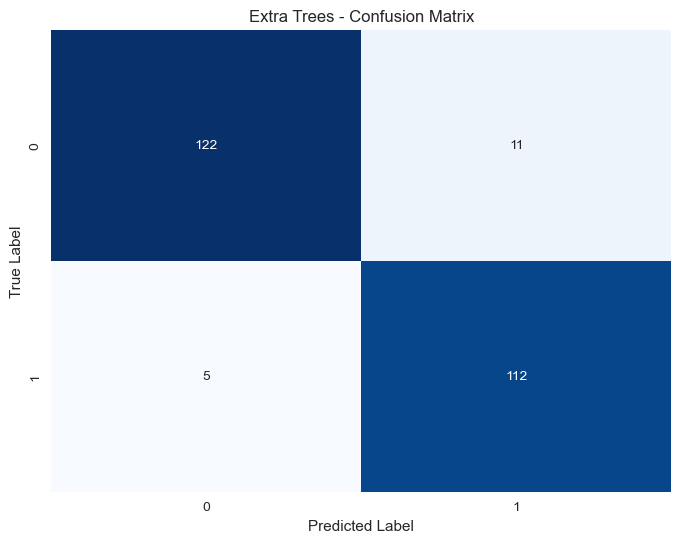

In [4]:
# Create and train an Extra Trees Classifier
et_clf = ExtraTreesClassifier(
    n_estimators=100,       # Number of trees
    max_features='sqrt',    # Number of features to consider for best split
    bootstrap=False,        # Default for Extra Trees (no bootstrap)
    random_state=42
)

# Train the model
et_clf.fit(X_train, y_train)

# Make predictions
y_pred = et_clf.predict(X_test)
y_prob = et_clf.predict_proba(X_test)[:, 1]  # Probability for class 1

# Evaluate the model
print("\n--- Extra Trees Classification Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Extra Trees - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### **5.2 Regression Example**


--- Extra Trees Regression Results ---
R² Score: 0.7525
Mean Squared  Error : 9040.5758
Mean Absolute Error : 73.6247


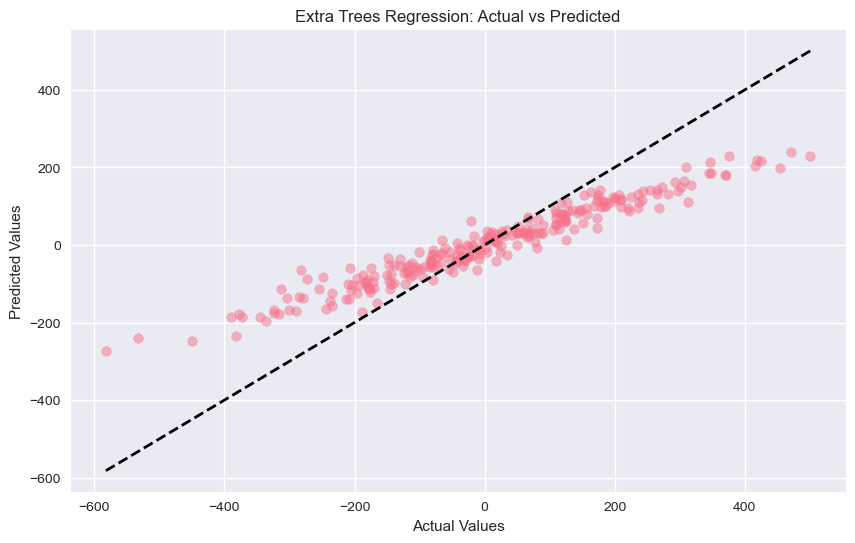

In [6]:
X_reg, y_reg = make_regression(n_samples=1000,n_features=20,n_informative=10,noise=0.1,random_state=42)

# Split the regression data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)

# Create and train an Extra Trees Regressor
et_reg = ExtraTreesRegressor(n_estimators=100,max_features='sqrt',bootstrap=False,random_state=42)

# Train the model
et_reg.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = et_reg.predict(X_test_reg)

# Evaluate the model
print("\n--- Extra Trees Regression Results ---")
print(f"R² Score: {r2_score(y_test_reg, y_pred_reg):.4f}")
print(f"Mean Squared  Error : {mean_squared_error(y_test_reg, y_pred_reg):.4f}")
print(f"Mean Absolute Error : {mean_absolute_error(y_test_reg, y_pred_reg):.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.title('Extra Trees Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

## **🔍 6. Key Hyperparameters Explained**

Extra Trees has several important hyperparameters that affect its behavior and performance:

| 📌 **Parameter** | 📝 **Description** | 🔧 **Typical Values** | 💡 **Impact** |
| --------------- | ------------------ | -------------------- | ------------ |
| **n_estimators** | Number of trees in the forest | 100-500 | Higher values reduce variance but increase training time |
| **max_features** | Number of features to consider for best split | `sqrt`, `log2`, float | Controls randomness in feature selection |
| **bootstrap** | Whether to use bootstrap samples | False (default), True | False uses all data for each tree, True uses random samples |
| **max_depth** | Maximum depth of trees | None, int | Controls complexity of trees, None means unlimited |
| **min_samples_split** | Minimum samples required to split a node | 2, int, float | Controls when to stop splitting nodes |
| **min_samples_leaf** | Minimum samples required in a leaf node | 1, int, float | Prevents creating very small leaf nodes |
| **criterion** | Function to measure split quality | 'gini'/'entropy' (clf), 'mse'/'mae' (reg) | Splitting criterion for nodes |

### **Key Differences from Random Forest Parameters**

- **bootstrap**: Default is `False` in Extra Trees (vs. `True` in Random Forest)
- **Splitting strategy**: Extra Trees uses random splits regardless of parameter settings

## **🔄 7. Hyperparameter Tuning**

In [7]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators'      : [50, 100, 200],
    'max_features'      : ['sqrt', 'log2', 0.3],
    'max_depth'         : [None, 10, 20],
    'min_samples_split' : [2, 5, 10],
    'bootstrap'         : [False, True]  # Include both options to compare
}

# Create a grid search object
grid_search = GridSearchCV(estimator=ExtraTreesClassifier(random_state=42),param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1,verbose=1)

# Fit the grid search (Note: This may take some time to run)
# Uncomment the next line to run the grid search
grid_search.fit(X_train, y_train)

# Display best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Create a model with the best parameters
best_et = grid_search.best_estimator_

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 0.3, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.9453


## **📊 8. Feature Importance Visualization**

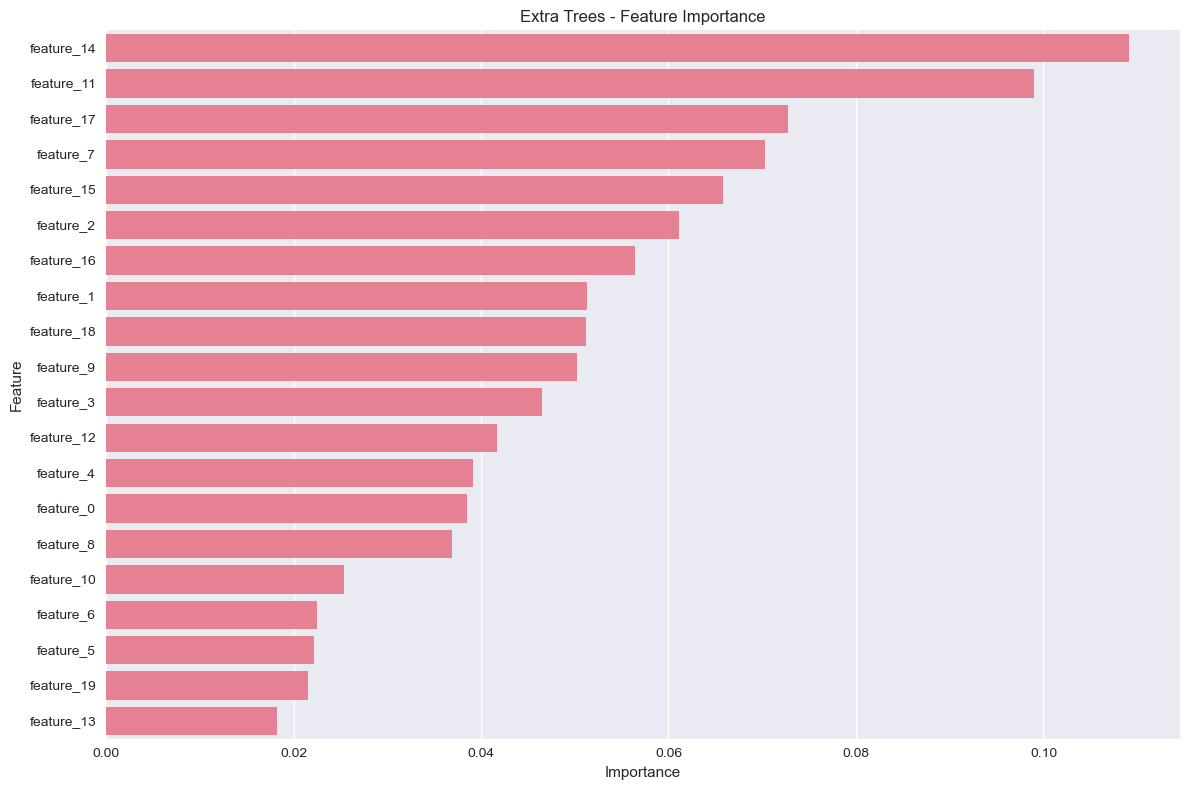

Top 10 Most Important Features:


,Feature,Importance
14,feature_14,0.109108
11,feature_11,0.099012
17,feature_17,0.072762
7,feature_7,0.070331
15,feature_15,0.065765
2,feature_2,0.061099
16,feature_16,0.056470
1,feature_1,0.051288
18,feature_18,0.051250
9,feature_9,0.050281


In [8]:
# Get feature importances from the trained model
feature_importances = et_clf.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Extra Trees - Feature Importance')
plt.tight_layout()
plt.show()

# Print top 10 features
print("Top 10 Most Important Features:")
display(importance_df.head(10))

## **🔄 9. Comparison with Random Forest**

--- Model Comparison ---
Extra Trees   Accuracy : 0.94
Random Forest Accuracy : 0.92
Difference: 0.0200

Extra Trees   Training Time: 0.17 seconds
Random Forest Training Time: 0.40 seconds
Speed Improvement: 2.39x faster


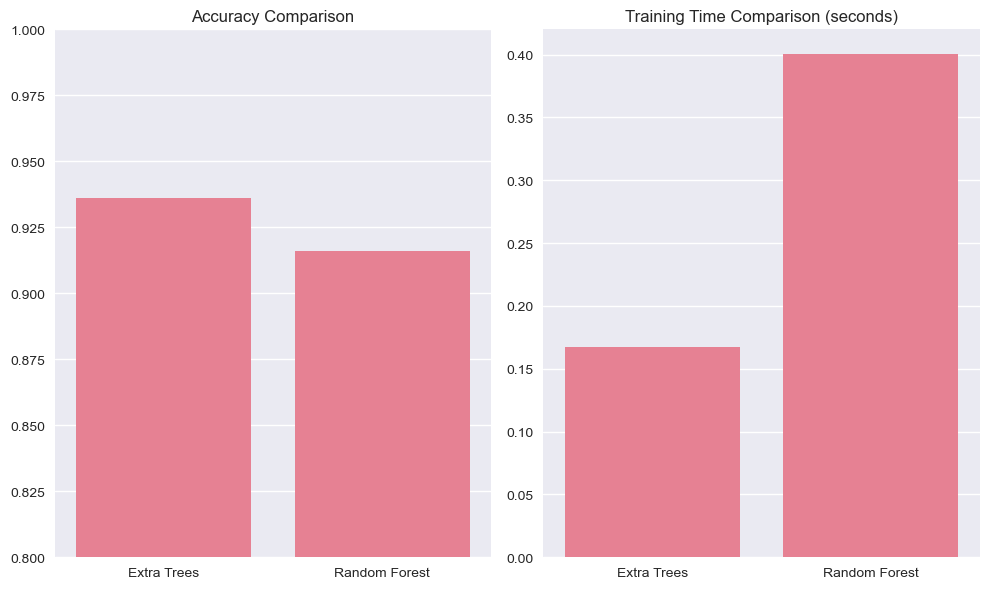

In [ ]:
# Create and train a Random Forest model with similar parameters
rf_clf = RandomForestClassifier(n_estimators=100,max_features='sqrt',bootstrap=True,random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
rf_pred = rf_clf.predict(X_test)

# Compare accuracy
et_accuracy = accuracy_score(y_test, y_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("--- Model Comparison ---")
print(f"Extra Trees   Accuracy : {et_accuracy:.2f}")
print(f"Random Forest Accuracy : {rf_accuracy:.2f}")
print(f"Difference: {abs(et_accuracy - rf_accuracy):.4f}")


# Extra Trees timing
start_time = time.time()
ExtraTreesClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
et_time = time.time() - start_time

# Random Forest timing
start_time = time.time()
RandomForestClassifier(n_estimators=100, random_state=42).fit(X_train, y_train)
rf_time = time.time() - start_time

print(f"\nExtra Trees   Training Time: {et_time:.2f} seconds")
print(f"Random Forest Training Time: {rf_time:.2f} seconds")
print(f"Speed Improvement: {(rf_time / et_time):.2f}x faster")

# Visualize comparison
plt.figure(figsize=(10, 6))
models = ['Extra Trees', 'Random Forest']
accuracies = [et_accuracy, rf_accuracy]
training_times = [et_time, rf_time]

# Plot accuracy comparison
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracies)
plt.title('Accuracy Comparison')
plt.ylim(0.8, 1.0)  # Adjust as needed

# Plot training time comparison
plt.subplot(1, 2, 2)
sns.barplot(x=models, y=training_times)
plt.title('Training Time Comparison (seconds)')

plt.tight_layout()
plt.show()

## **💡 10. Best Practices and Tips**

### **When to Choose Extra Trees**

- **Speed is critical**: Extra Trees is generally faster than Random Forest
- **Noise handling**: Better with noisy datasets due to random splitting
- **Reducing overfitting**: The additional randomization helps prevent overfitting

### **Tuning Tips**

1. **Start with defaults**: The default parameters often work well
2. **n_estimators**: Increase for better performance (diminishing returns after ~500)
3. **bootstrap**: Try both `False` (default) and `True` to see which works better
4. **max_features**: Key parameter affecting randomness; try 'sqrt', 'log2', and values like 0.3
5. **min_samples_split/min_samples_leaf**: Increase to reduce overfitting

### **Practical Considerations**

- **Memory usage**: Similar to Random Forest, scales with n_estimators and dataset size
- **Parallelization**: Use `n_jobs=-1` for training on all available cores
- **Feature importance**: More stable than single decision trees, but still has limitations
- **Randomness**: Set `random_state` for reproducible results

### **Common Pitfalls**

- **Assuming it's always better than Random Forest**: Performance depends on the dataset
- **Ignoring the bootstrap parameter**: The default (`False`) differs from Random Forest
- **Overtuning**: Sometimes simpler models with fewer parameters work better
- **Interpretability**: Like all ensemble methods, less interpretable than single trees

## **📚 11. Additional Resources**

### **Papers**

- [Extremely Randomized Trees](https://link.springer.com/article/10.1007/s10994-006-6226-1) - Original paper by Geurts et al.
- [Understanding Random Forests](https://arxiv.org/abs/1407.7502) - Comprehensive analysis of tree-based methods

### **Documentation**

- [Scikit-learn ExtraTreesClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html)
- [Scikit-learn ExtraTreesRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html)

### **Tutorials and Guides**

- [Scikit-learn Ensemble Methods Guide](https://scikit-learn.org/stable/modules/ensemble.html)
- [Towards Data Science: Understanding Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

---

<h3 align="center">🌲 Happy Modeling with Extra Trees! 🌲</h3>